<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 15</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Ecuaciones Diferenciales: Método de Euler y aplicación en física
    </p>
</div>

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

### **Método de Euler**

Considere una ecuación diferencial de primer orden en su forma estándar:

$$ \frac{dy}{dt} = f(t, y) $$

Para aproximar la solución, utilizamos el método *forward difference* para encontrar derivadas numéricas:

$$ \frac{dy}{dt} \approx  \frac{y_{n+1} - y_n}{h} $$

De esta forma, tenemos:

$$ \frac{y_{n+1} - y_n}{h} = f(t_n, y_n) $$

Despejando $ y_{n+1} $:


$$ \boxed{ y_{n+1} = y_n + h f(t_n, y_n) }$$

Además:

$$ \boxed{ t_{n+1} = t_n + h }$$

Este método nos permite calcular iterativamente la solución de una ecuación diferencial a partir de su condición inicial.

</div>

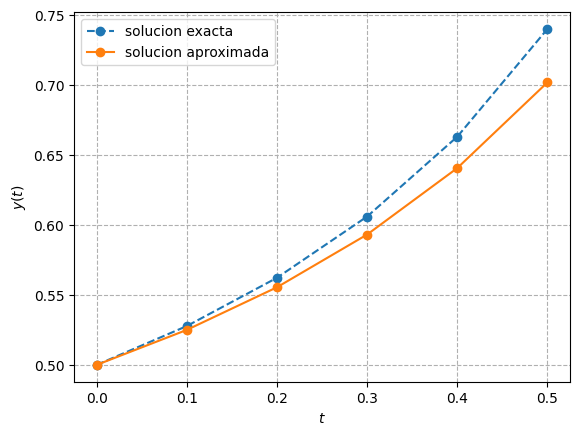

In [7]:
from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

def euler_method(f: Callable[[float, float], float], t0: float, y0: float, h: float, tf: float) -> tuple[ndarray, ndarray]:
    """Euler method to solve first-order ordinary differential equations (ODE)

    Args:
        f (Callable[[float, float], float]): Function f(t, y) representing the ODE dy/dt = f(t, y)
        t0 (float): Initial value of the independent variable
        y0 (float): Initial value of the dependent variable
        h (float): Step size for the independent variable
        tf (float): Final value of the independent variable

    Returns:
        tuple[np.ndarray, np.ndarray]: Tuple (t, y) where:
            t (np.ndarray): Discrete values of the independent variable
            y (np.ndarray): Approximate values of the dependent variable at each t
    """

    # vector of the independent variable
    t = np.arange(start=t0, step=h, stop=tf + h)

    # vector of the dependent variable
    y = np.zeros_like(t)

    # initial condition
    y[0] = y0

    # iteration to find the solution
    for n in range(len(t) - 1):
        y[n + 1] = y[n] + h * f(t[n], y[n])

    return t, y

def f(t,y): # ec diferencial
    return np.exp(t) * y**2

def y(t):
    return 1 / (3 - np.exp(t))


t, y_approx = euler_method(f=f, t0=0, y0=0.5, h=0.1, tf=0.5)

y_exacta = y(t)

plt.plot(t, y_exacta, label="solucion exacta", marker="o", ls="--")
plt.plot(t, y_approx, label="solucion aproximada", marker="o")

plt.legend()
plt.grid(ls="--")
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")

plt.show()

In [24]:
for i in range(len(t)-1):
    print(f"y{i+1} = y{i} + h * f(t{i}, y{i}) = {y_approx[i]:.2f} + 0.1 * f({t[i]:.2f}, {y_approx[i]:.2f}) = {y_approx[i+1]:.2f}")

y1 = y0 + h * f(t0, y0) = 0.50 + 0.1 * f(0.00, 0.50) = 0.53
y2 = y1 + h * f(t1, y1) = 0.53 + 0.1 * f(0.10, 0.53) = 0.56
y3 = y2 + h * f(t2, y2) = 0.56 + 0.1 * f(0.20, 0.56) = 0.59
y4 = y3 + h * f(t3, y3) = 0.59 + 0.1 * f(0.30, 0.59) = 0.64
y5 = y4 + h * f(t4, y4) = 0.64 + 0.1 * f(0.40, 0.64) = 0.70


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio:**

Se dejan caer simultáneamente desde 20 metros de altura: una pelota de ping-pong, cuya masa es $m=2.7g$, con un radio $r=2$ cm, y una pelota de acero del mismo tamaño pero con una masa de $m=220g$. para ambas pelotas, la fuerza de resistencia del aire es $F=6\pi \eta r v$ (ley de Stokes), donde $\eta = 1.8 \times 10^{-5}  \text{kg m}^{-1} \text{s}^{-1}$ es la viscosidad del aire, $r$ el radio de la pelota y $v$ su rapidez.

  a) Calcule la velocidad terminal de cada pelota

  b) Determine cuál llega primero al suelo y por cuánto tiempo de diferencia

Encuentre la solución númerica de este problema usando el método de Euler y además compare su resultado aproximado con la solución analítica (exacta) del problema.

</div>

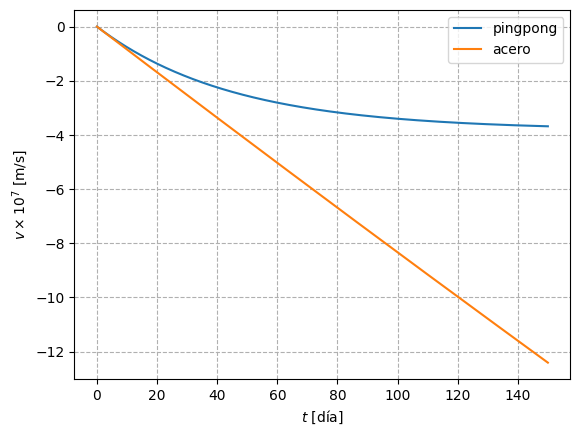

In [59]:
eta = 1.8e-5
r   = 0.02
g   = 9.8

h = 60

def f_pingpong(t, v):
    m = 2.7 * g
    return (- 6*np.pi*eta*r*v - m*g) / m


def f_acero(t, v):
    m = 200 * g
    return (- 6*np.pi*eta*r*v - m*g) / m

t, v = euler_method(f=f_pingpong, t0=0, y0=0, tf=60 * 60 * 24 * 150, h=h)
t, v_sin_roce = euler_method(f=f_acero, t0=0, y0=0, tf=60 * 60 * 24 * 150, h=h)

plt.plot(t / 60 / 60 / 24, v * 1e-7, label="pingpong")
plt.plot(t / 60 / 60 / 24, v_sin_roce * 1e-7, label="acero")

plt.xlabel(r"$t$ [día]")
plt.ylabel(r"$v \times 10^7$ [m/s]")

plt.legend()
plt.grid(ls="--")

plt.show()

¿Como obtenemos la altura?

Recordar que $$ \frac{dy}{dt} = v \Rightarrow y_{n+1} = y_n + h \cdot v_n$$

Si $y_0 = 20$ m, entonces podemos calcular la altura a tiempos posteriores:

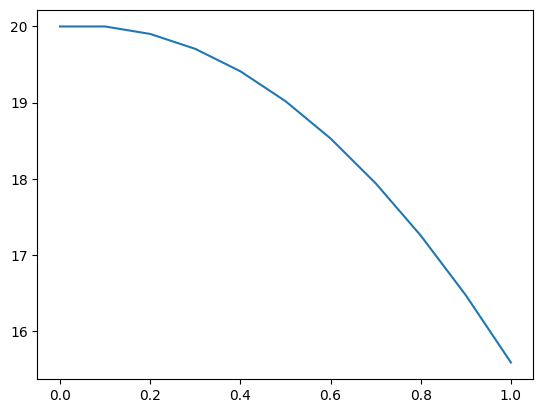

In [34]:
y = np.zeros_like(v)
y[0] = 20 # m

for n in range(len(t) - 1):
    y[n+1] = y[n] + h * v[n]

plt.plot(t, y)

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

- Implementamos el método de Euler en Python
- Encontramos solución al problema de caída de una partícula con resistencia del aire de forma analítica y aproximada
- Encontramos tanto velocidad como posición de la partícula de forma aproximada

**Próxima clase:** Ecuaciones Diferenciales: Método de Runge-Kutta de segundo orden

</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>